In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# to understand the structure of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52456 entries, 0 to 53004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      0 non-null      float64
 1   BMI               52456 non-null  float64
 2   Smoking           52456 non-null  int64  
 3   AlcoholDrinking   52456 non-null  int64  
 4   Stroke            52456 non-null  int64  
 5   PhysicalHealth    52456 non-null  float64
 6   MentalHealth      52456 non-null  float64
 7   DiffWalking       52456 non-null  int64  
 8   Sex               52456 non-null  int64  
 9   AgeCategory       52456 non-null  int64  
 10  Race              52456 non-null  int64  
 11  Diabetic          52456 non-null  int64  
 12  PhysicalActivity  52456 non-null  int64  
 13  GenHealth         52456 non-null  int64  
 14  SleepTime         52456 non-null  float64
 15  Asthma            52456 non-null  int64  
 16  KidneyDisease     52456 non-null  int64  
 17

DATA CLEANING

In [ ]:
# check whether it has missing value
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
# check whether it has duplicated rows
df.duplicated().sum()

np.int64(8240)

In [ ]:
# drop duplicates row
df.drop_duplicates(inplace=True)

In [ ]:
df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']].apply(pd.Series.unique)

,0
HeartDisease,"[No, Yes]"
Smoking,"[Yes, No]"
AlcoholDrinking,"[No, Yes]"
Stroke,"[No, Yes]"
DiffWalking,"[No, Yes]"
Sex,"[Female, Male]"
Diabetic,"[Yes, No, No, borderline diabetes, Yes (during..."
AgeCategory,"[55-59, 80 or older, 65-69, 75-79, 40-44, 70-7..."
Race,"[White, Black, Asian, American Indian/Alaskan ..."
PhysicalActivity,"[Yes, No, nan]"


In [ ]:
# let 'No'= 0, 'Yes'= 1
yes_no_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
df[yes_no_columns] = df[yes_no_columns].replace(['No', 'Yes'], [0, 1])

<ipython-input-7-2181952663>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace(['No', 'Yes'], [0, 1])


In [ ]:
# let 'Female'= 0, 'Male'= 1
df['Sex'] = df['Sex'].replace(['Female', 'Male'], [0, 1])

<ipython-input-8-3188539665>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(['Female', 'Male'], [0, 1])


In [ ]:
diabetic_category = {'No': 0, 'Yes': 1, 'No, borderline diabetes': 2, 'Yes (during pregnancy)': 3}
df['Diabetic'] = df['Diabetic'].map(diabetic_category)

In [ ]:
age_category = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}
df['AgeCategory'] = df['AgeCategory'].map(age_category)

In [ ]:
race_category = {'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Hispanic': 4, 'Other': 5}
df['Race'] = df['Race'].map(race_category)

In [ ]:
gen_health_category = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
df['GenHealth'] = df['GenHealth'].map(gen_health_category)

In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
0,174491
1,17000


In [ ]:
# normalise data
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
scaler = MinMaxScaler()
normalized_columns = scaler.fit_transform(df[numerical_columns])
normalized_df = df.copy()
normalized_df[numerical_columns] = normalized_columns
normalized_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,7.0,0.0,1.0,1.0,3.0,0.173913,1.0,0.0,1.0
1,0,0.100447,0,0,1,0.000000,0.0,0,0,12.0,0.0,0.0,1.0,3.0,0.260870,0.0,0.0,0.0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,9.0,0.0,1.0,1.0,1.0,0.304348,1.0,0.0,0.0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,11.0,0.0,0.0,0.0,2.0,0.217391,0.0,0.0,1.0
4,0,0.141132,0,0,0,0.933333,0.0,1,0,4.0,0.0,0.0,1.0,3.0,0.304348,0.0,0.0,0.0


DATA EXPLORATION

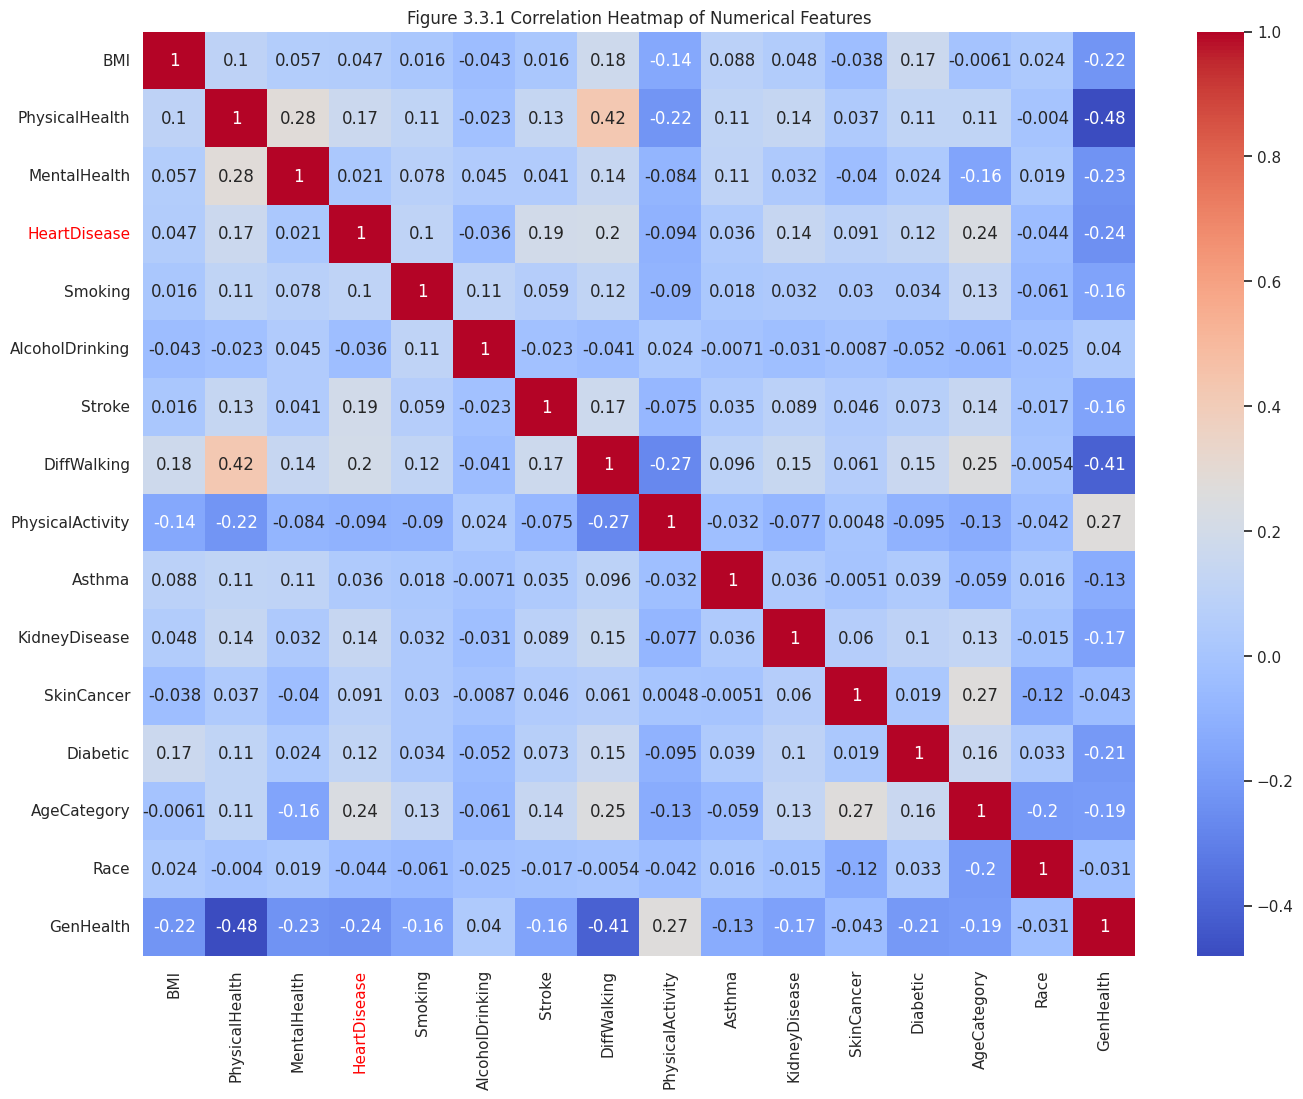

In [ ]:
# Set basic plotting style
sns.set(style="whitegrid")

# Include only the actual numerical column names in numericals_features
numericals_features = ['BMI', 'PhysicalHealth', 'MentalHealth'] + yes_no_columns + ['Diabetic', 'AgeCategory', 'Race', 'GenHealth']

# --- Step 1: Correlation Heatmap (Figure 3.3.1) ---
# Only numerical features are used for correlation
plt.figure(figsize=(16,12))
sns.heatmap(df[numericals_features].corr(), annot=True, cmap='coolwarm')
plt.title('Figure 3.3.1 Correlation Heatmap of Numerical Features')
ax = plt.gca()

# Iterate through x-axis tick labels
for tick_label in ax.get_xticklabels():
    if tick_label.get_text() == "HeartDisease":
        tick_label.set_color("red")

# Iterate through y-axis tick labels
for tick_label in ax.get_yticklabels():
    if tick_label.get_text() == "HeartDisease":
        tick_label.set_color("red")
plt.show()

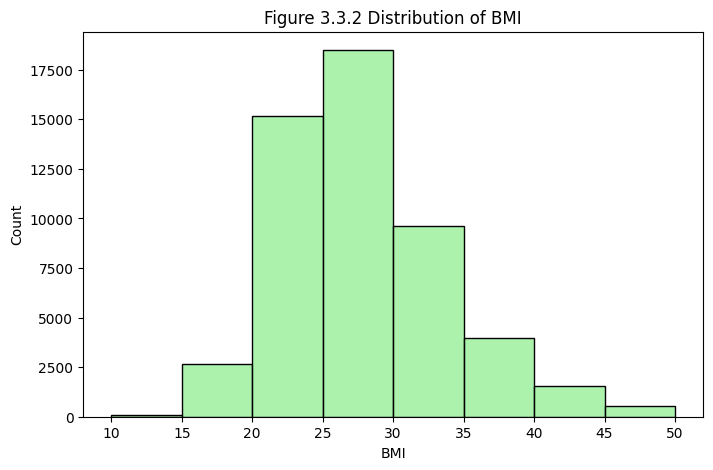

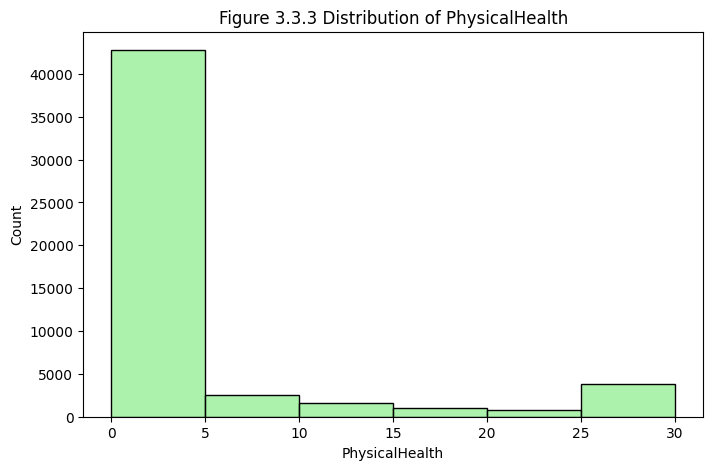

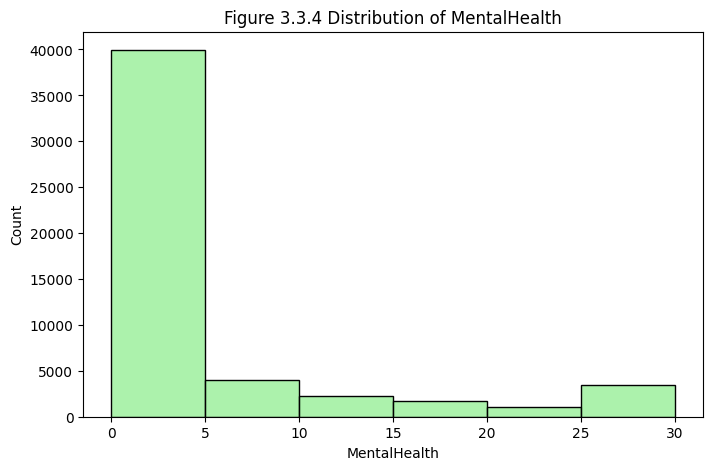

In [ ]:
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth']

bins_dict = {
    'BMI': [10,15,20,25,30,35,40,45,50],
    'PhysicalHealth': [0,5,10,15,20,25,30],
    'MentalHealth': [0,5,10,15,20,25,30]
}

for idx, feature in enumerate(numerical_features, start=2):
    plt.figure(figsize=(8,5))
    sns.histplot(df[feature],bins=bins_dict[feature], color='lightgreen', edgecolor='black')
    plt.title(f'Figure 3.3.{idx} Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


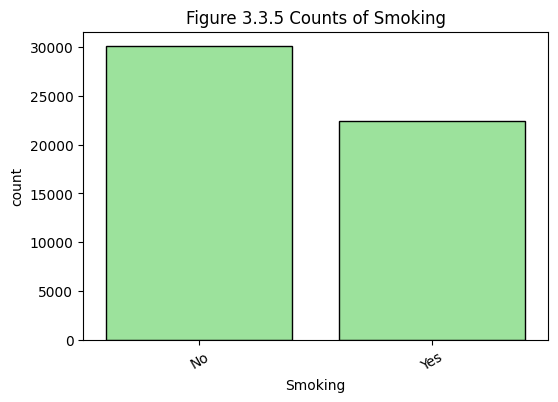

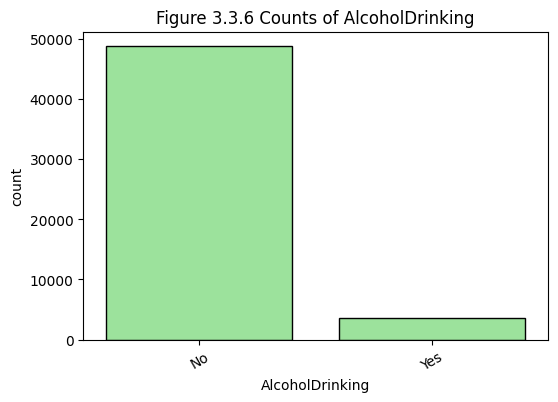

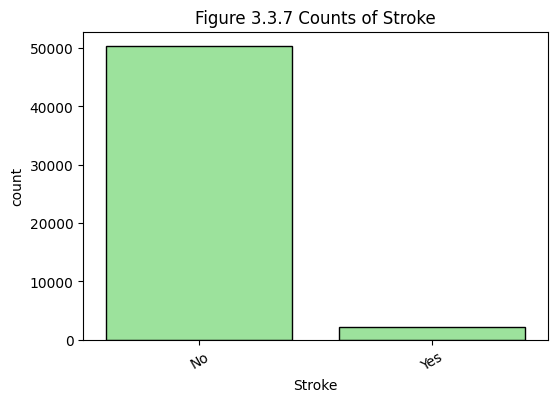

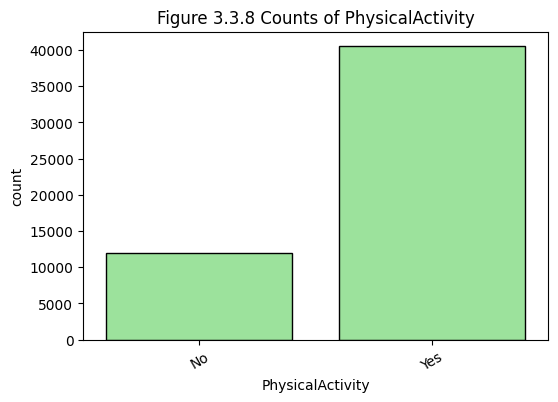

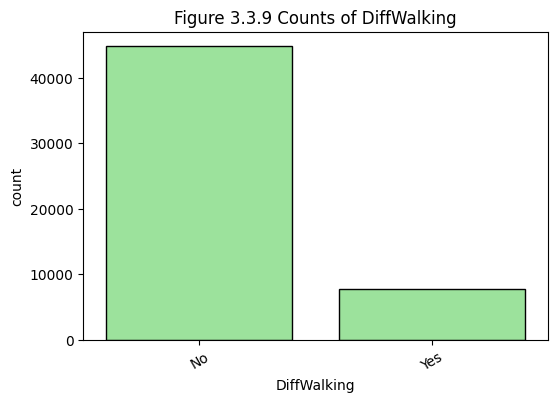

In [ ]:
# --- Step 3: Bar Chart for Categorical Variables (Figures 3.3.8 - 3.3.10) ---

categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalActivity', 'DiffWalking']

for idx, feature in enumerate(categorical_features, start=5):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=feature,color='lightgreen', edgecolor='black')
    plt.title(f'Figure 3.3.{idx} Counts of {feature}')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xticks(rotation=30)
    plt.show()

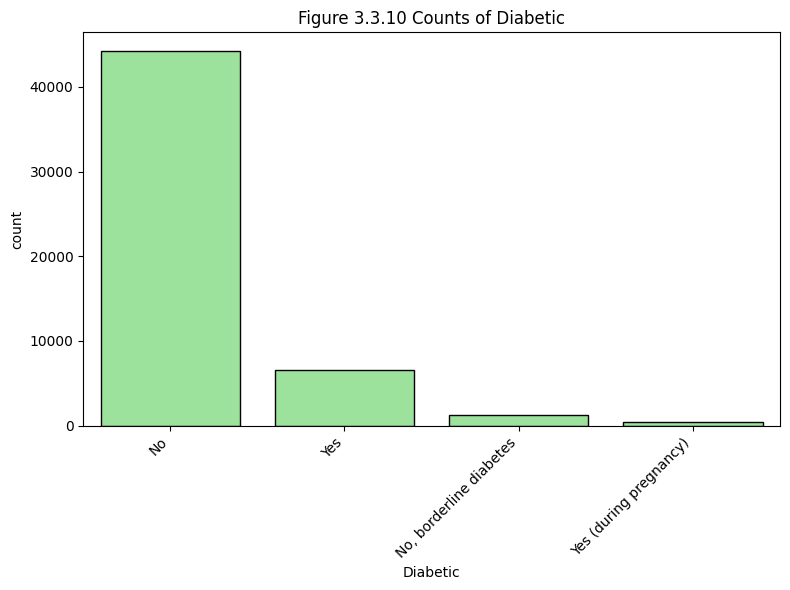

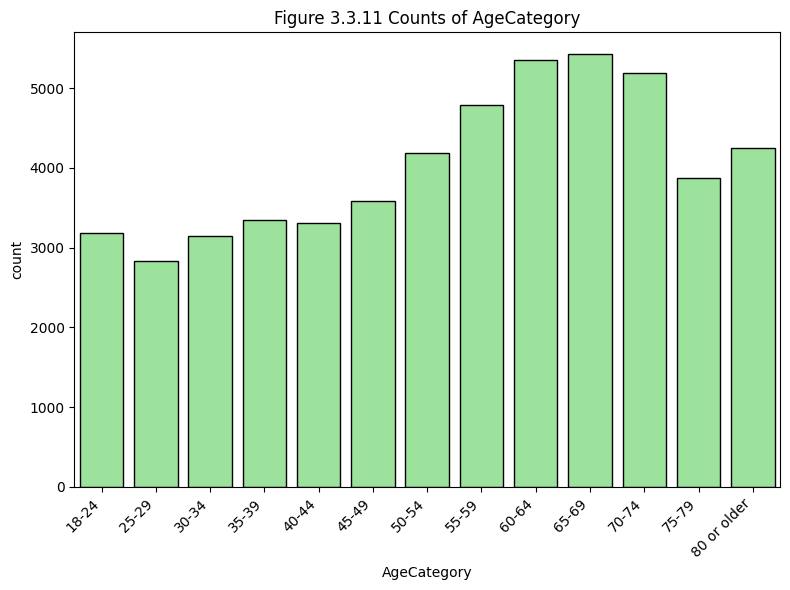

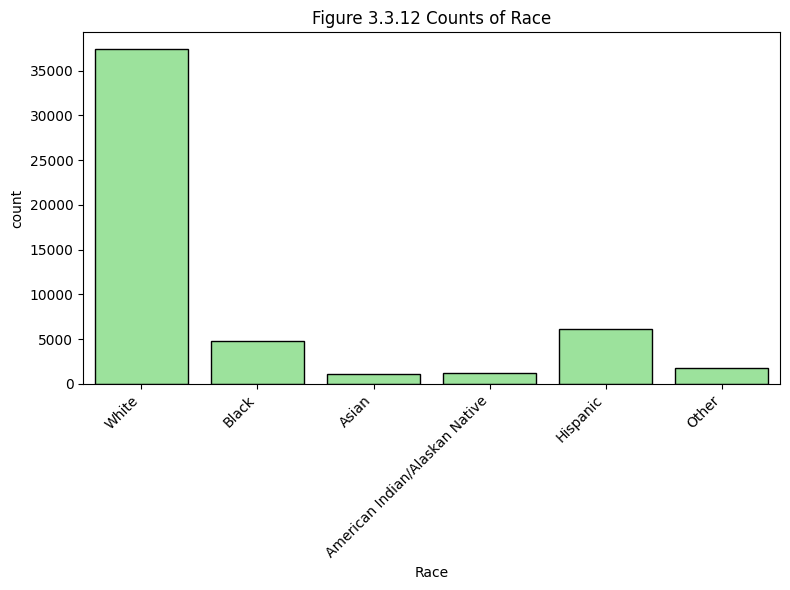

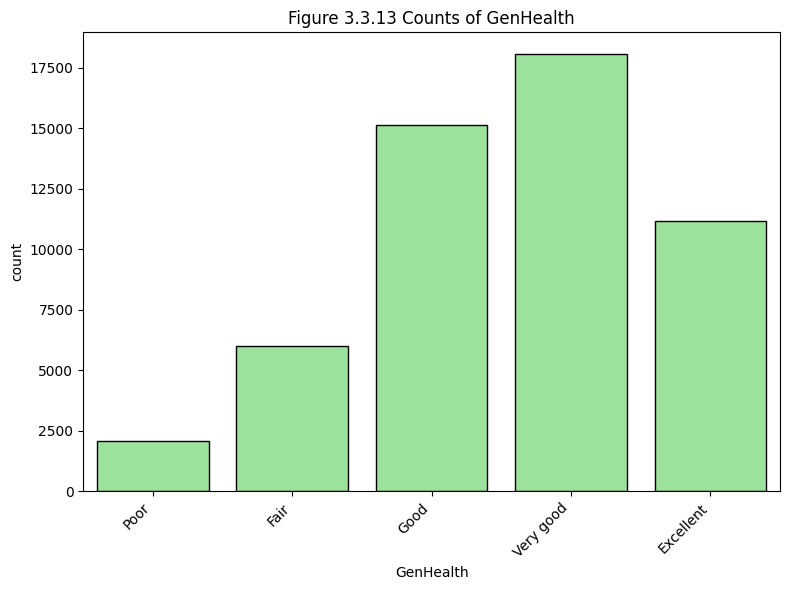

In [ ]:
multiple_choice = ['Diabetic', 'AgeCategory', 'Race', 'GenHealth']

for idx, feature in enumerate(multiple_choice, start=10):
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.countplot(data=df, x=feature, color='lightgreen', edgecolor='black')
    plt.title(f'Figure 3.3.{idx} Counts of {feature}')

    # Custom x-axis ticks and labels for each feature
    if feature == 'Diabetic':
        plt.xticks([0, 1, 2, 3], ['No', 'Yes', 'No, borderline diabetes', 'Yes (during pregnancy)'], rotation=45, ha='right')
    elif feature == 'AgeCategory':
        plt.xticks(range(13), ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], rotation=45, ha='right')
    elif feature == 'Race':
        plt.xticks([0, 1, 2, 3, 4, 5], ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Hispanic', 'Other'], rotation=45, ha='right')
    elif feature == 'GenHealth':
        plt.xticks([0, 1, 2, 3, 4], ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

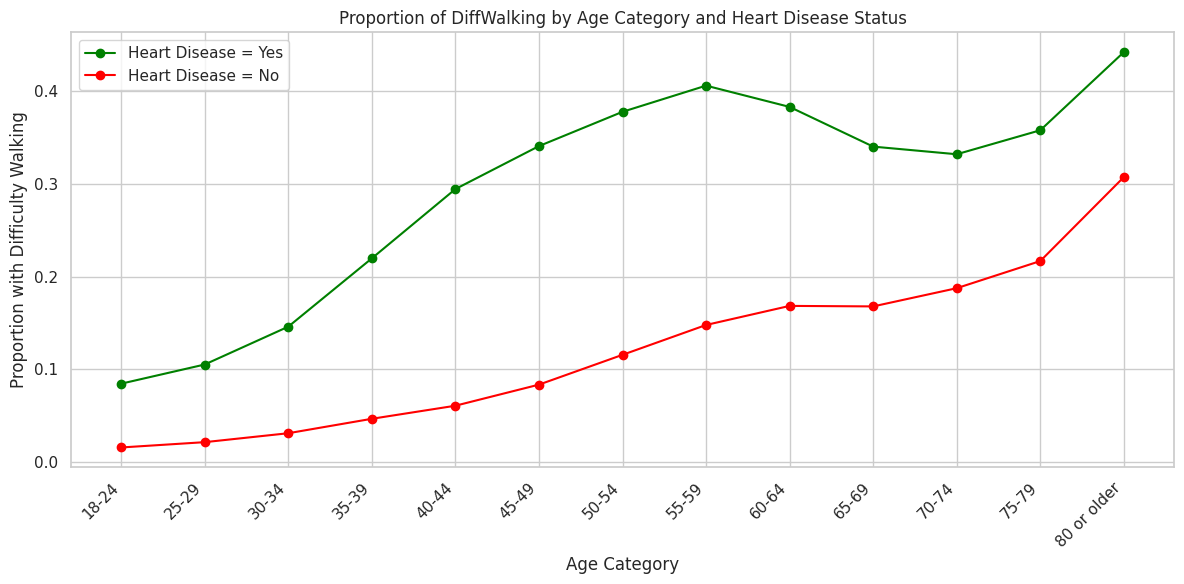

In [ ]:
# Step 1: Group and calculate percentage of SkinCancer = Yes
grouped = df.groupby(['AgeCategory', 'HeartDisease'])['DiffWalking'].value_counts(normalize=True).unstack().fillna(0)

# Step 2: Plot
plt.figure(figsize=(12,6))

# Get unique age categories and their numerical mappings
age_categories = list(age_category.keys())  # Get original age category labels
age_mappings = list(age_category.values())  # Get numerical mappings

# Changed 'Yes' to 1 for HeartDisease in loc
plt.plot(age_mappings,  # Use numerical mappings for plotting
         grouped.loc[(slice(None), 1), 1],
         marker='o', label='Heart Disease = Yes', color='green')

# Changed 'No' to 0 for HeartDisease in loc
plt.plot(age_mappings,  # Use numerical mappings for plotting
         grouped.loc[(slice(None), 0), 1],
         marker='o', label='Heart Disease = No', color='red')

plt.title('Proportion of DiffWalking by Age Category and Heart Disease Status')
plt.xlabel('Age Category')
plt.ylabel('Proportion with Difficulty Walking')  # Corrected y-axis label
plt.xticks(age_mappings, age_categories, rotation=45, ha='right') # Set custom ticks and labels
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

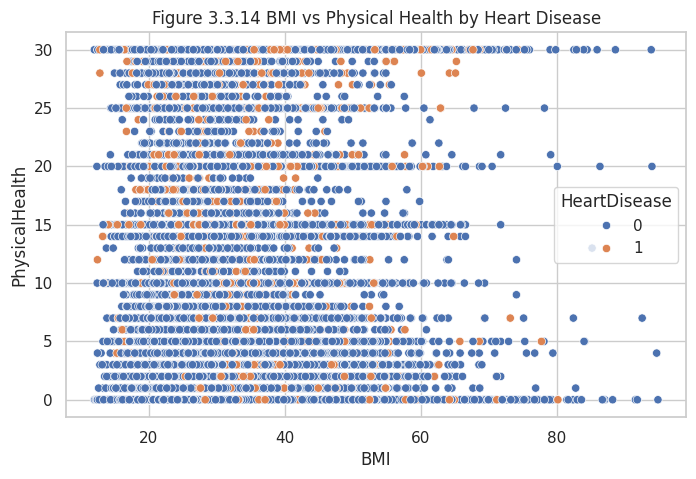

In [ ]:
# --- Step 4: Scatterplots to Examine Relationships (Figures 3.3.11 - 3.3.13) ---

# BMI vs Physical Health
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='BMI', y='PhysicalHealth', hue='HeartDisease')
plt.title('Figure 3.3.14 BMI vs Physical Health by Heart Disease')
plt.show()



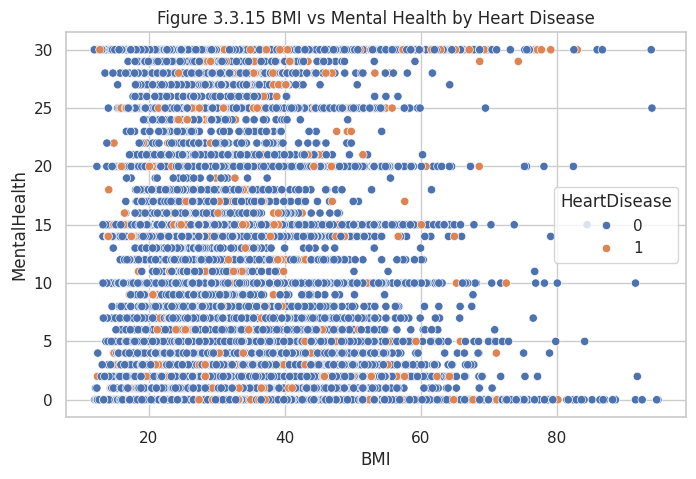

In [ ]:
# BMI vs Mental Health
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='BMI', y='MentalHealth', hue='HeartDisease')
plt.title('Figure 3.3.15 BMI vs Mental Health by Heart Disease')
plt.show()


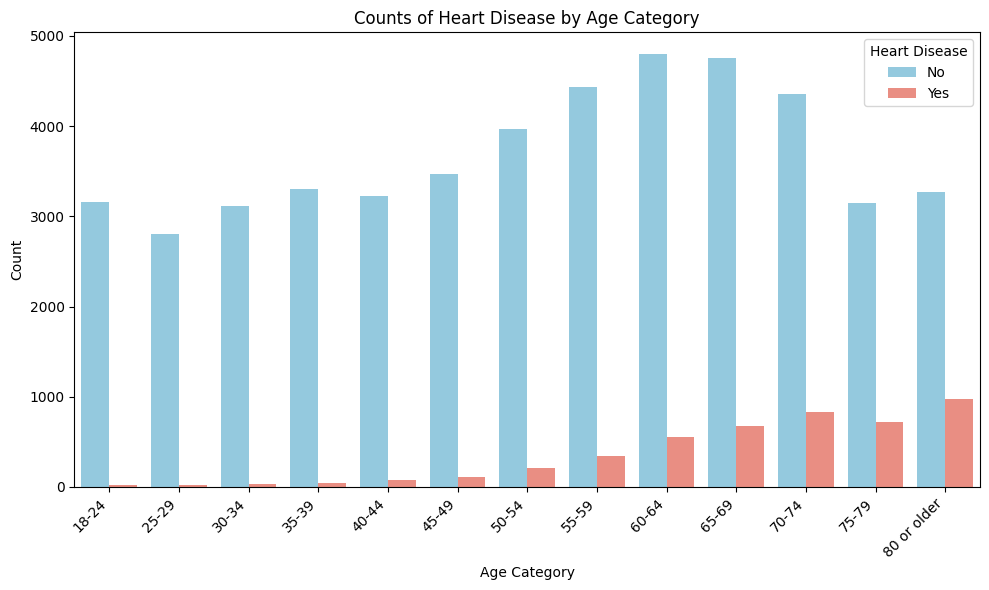

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', palette=['skyblue', 'salmon'])
plt.title('Counts of Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Custom x-axis tick labels (replace with your actual age category labels if different)
age_categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
plt.xticks(range(len(age_categories)), age_categories)

plt.legend(title='Heart Disease', labels=['No', 'Yes'])  # Customize legend labels
plt.tight_layout()
plt.show()

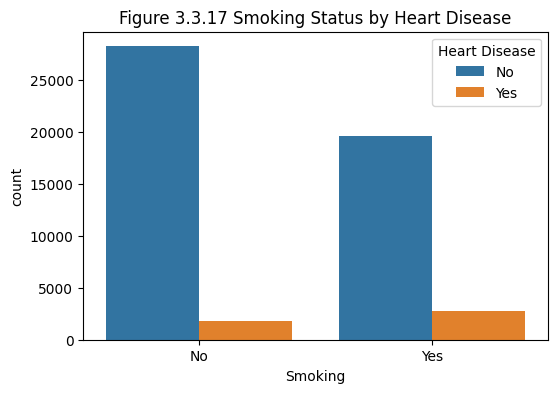

In [ ]:
# --- Step 6: Grouped Bar Charts (Figures 3.3.17 - 3.3.19) ---
# Smoking vs Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Smoking', hue='HeartDisease')
plt.title('Figure 3.3.17 Smoking Status by Heart Disease')
plt.xticks([0, 1], ['No', 'Yes'])  # Change x-axis labels
plt.legend(title='Heart Disease', labels=['No', 'Yes']) # Change legend labels
plt.show()

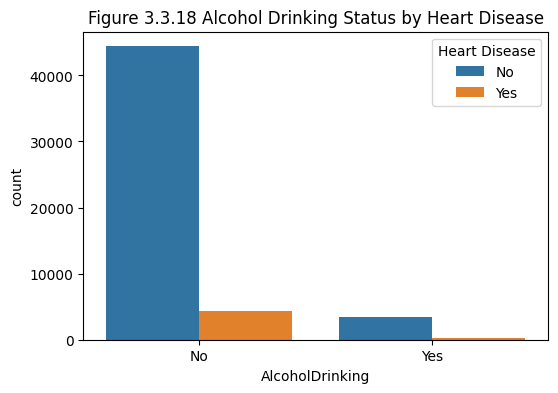

In [ ]:
# Alcohol Drinking vs Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='AlcoholDrinking', hue='HeartDisease')
plt.xticks([0, 1], ['No', 'Yes'])  # Change x-axis labels
plt.legend(title='Heart Disease', labels=['No', 'Yes']) # Change legend labels
plt.title('Figure 3.3.18 Alcohol Drinking Status by Heart Disease')
plt.show()

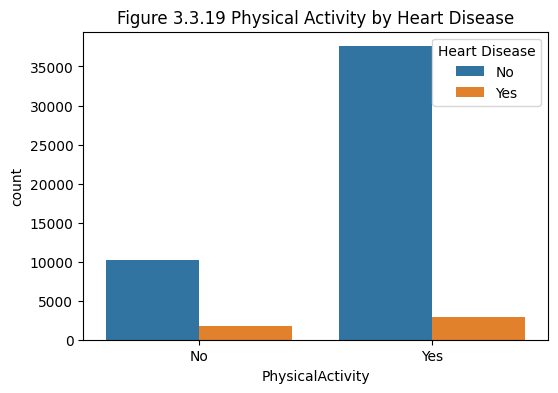

In [ ]:
# Physical Activity vs Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='PhysicalActivity', hue='HeartDisease')
plt.xticks([0, 1], ['No', 'Yes'])  # Change x-axis labels
plt.legend(title='Heart Disease', labels=['No', 'Yes']) # Change legend labels
plt.title('Figure 3.3.19 Physical Activity by Heart Disease')
plt.show()


<Axes: title={'center': 'Overall Heart Disease Distribution'}, ylabel='count'>

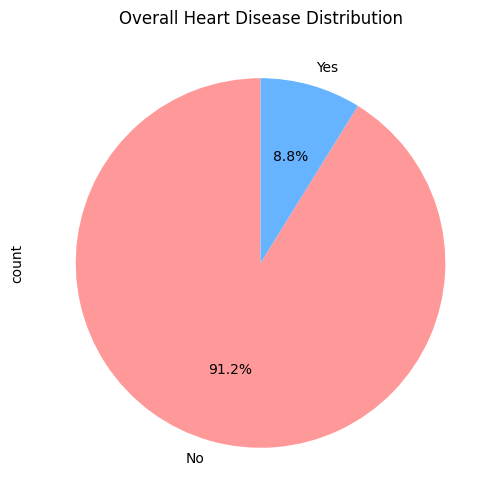

In [ ]:
# --- Step 7: Pie Charts for Overall Distribution (Figures 3.3.20 - 3.3.21) ---
# Heart Disease distribution
plt.figure(figsize=(6,6))
# Assuming 'HeartDisease' column has 0 and 1 representing "No" and "Yes"
heart_disease_counts = df['HeartDisease'].value_counts()
plt.title('Overall Heart Disease Distribution')
heart_disease_counts.index = ['No', 'Yes']  # Change index labels to "No" and "Yes"
heart_disease_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff"])

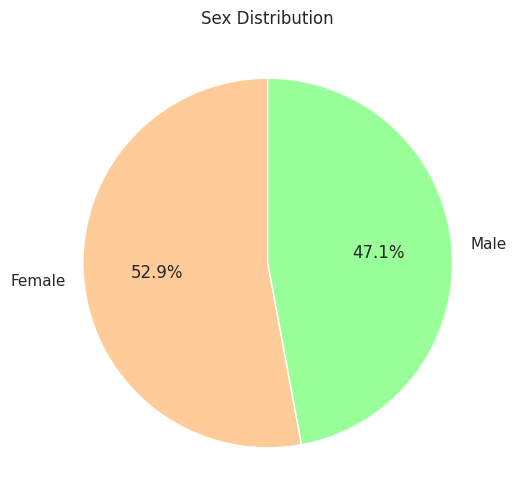

In [ ]:
# Sex distribution
plt.figure(figsize=(6,6))
sex_counts = df['Sex'].value_counts()
sex_counts.index = ['Female', 'Male']  # Change index labels to "Female" and "Male"
sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=["#ffcc99","#99ff99"])
plt.title('Sex Distribution')
plt.ylabel('')
plt.show()

DATA MODELLING

In [ ]:
# Map 'HeartDisease' from 'Yes'/'No' to 1/0
df['HeartDisease'] = df['HeartDisease'].map({'No': 0, 'Yes': 1})

In [ ]:
# Define features (X) and target (y)
x = normalized_df.drop(columns='HeartDisease')
y = normalized_df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on test data
y_pred = rf.predict(x_test)

Accuracy: 0.9027128645656545
Precision: 0.3487133984028394
Recall: 0.11610044313146234
F1 Score: 0.17420212765957446


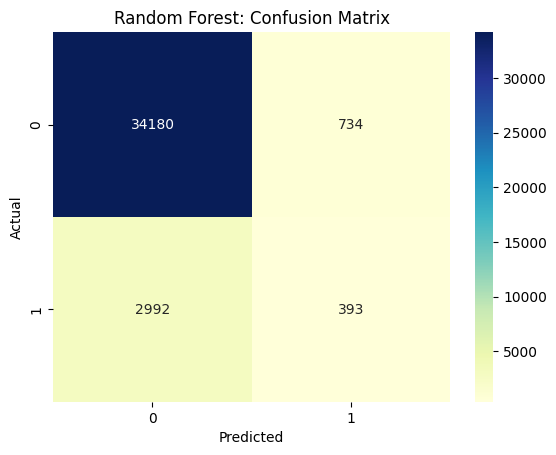

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)

rf_accuracy=accuracy_score(y_test,y_pred)
rf_precision=precision_score(y_test,y_pred)
rf_recall=recall_score(y_test,y_pred)
rf_f1=f1_score(y_test,y_pred)
# Evaluate the model
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Random Forest: Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train LightGBM model
# You can experiment with parameters like 'is_unbalance=True' or 'scale_pos_weight'
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 13615, number of negative: 139577
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 153192, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088875 -> initscore=-2.327444
[LightGBM] [Info] Start training from score -2.327444


LGBMClassifier(random_state=42)

In [ ]:
# Predict on test data
y_pred_lgbm = lgbm_model.predict(x_test)

LightGBM Accuracy: 0.9140708634690201
LightGBM Precision: 0.587360594795539
LightGBM Recall: 0.09335302806499261
LightGBM F1 Score: 0.16110119806270712


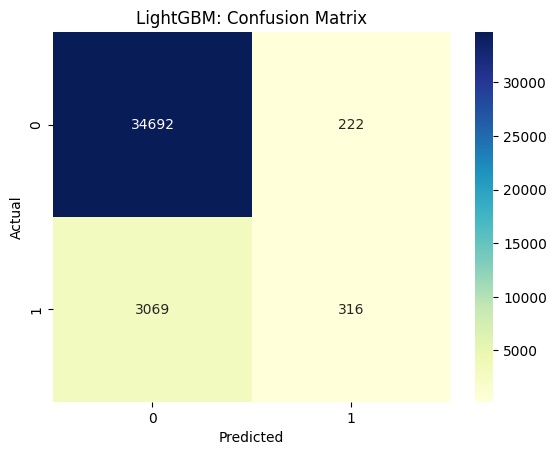

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)

lgbm_accuracy=accuracy_score(y_test,y_pred_lgbm)
lgbm_precision=precision_score(y_test,y_pred_lgbm)
lgbm_recall=recall_score(y_test,y_pred_lgbm)
lgbm_f1=f1_score(y_test,y_pred_lgbm)
# Evaluate the LightGBM model
print("LightGBM Accuracy:",lgbm_accuracy)
print("LightGBM Precision:", lgbm_precision)
print("LightGBM Recall:", lgbm_recall)
print("LightGBM F1 Score:", lgbm_f1)


# Confusion Matrix for LightGBM
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, cmap="YlGnBu", fmt="g")
plt.title("LightGBM: Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
file_path = "/content/heart_2020_cleaned.csv"
df = pd.read_csv(file_path)

In [ ]:
# Drop any rows with NaN values (precautionary step)
df = df.dropna()

In [ ]:
# Convert target variable to binary
df["HeartDisease"] = df["HeartDisease"].map({"Yes": 1, "No": 0})

In [ ]:
# Define features and target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [ ]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=["float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ]
)

In [ ]:
# Full pipeline with logistic regression
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['BMI', 'PhysicalHealth',
                                                   'MentalHealth',
                                                   'SleepTime']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Smoking', 'AlcoholDrinking',
                                                   'Stroke', 'DiffWalking',
                                                   'Sex', 'AgeCategory', 'Race',
                                                   'Diabetic',
                                                   'PhysicalActivity',
                                                   'GenHealth', 'Asthma',
                                                   'KidneyDisease',
                                                   'SkinCancer'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
# Predict and evaluate
y_pred_lr = pipeline.predict(X_test)

In [ ]:
lr_accuracy=accuracy_score(y_test,y_pred_lr)
lr_precision=precision_score(y_test,y_pred_lr)
lr_recall=recall_score(y_test,y_pred_lr)
lr_f1=f1_score(y_test,y_pred_lr)
# Print evaluation metrics
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:",lr_f1)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.9161117508636659
Precision: 0.5425685425685426
Recall: 0.11026392961876832
F1 Score: 0.1832805264440653

Confusion Matrix:
 [[36219   317]
 [ 3034   376]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     36536
           1       0.54      0.11      0.18      3410

    accuracy                           0.92     39946
   macro avg       0.73      0.55      0.57     39946
weighted avg       0.89      0.92      0.89     39946



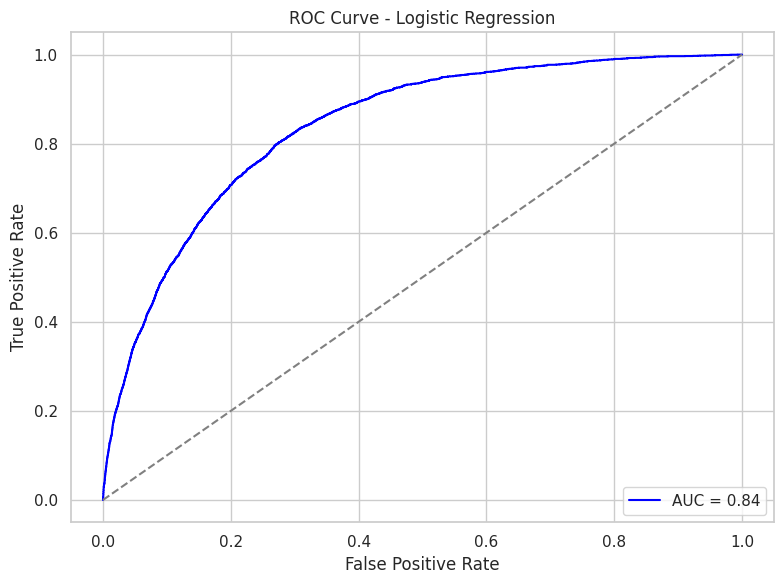

In [ ]:
# Predict probabilities for the positive class
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

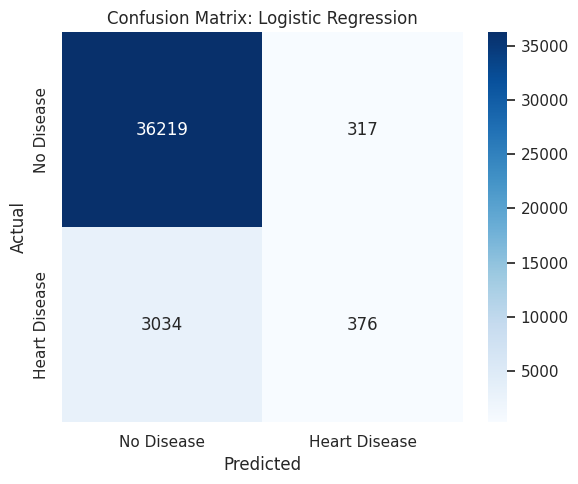

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Logistic Regression")
plt.tight_layout()
plt.show()

Data Interpretation

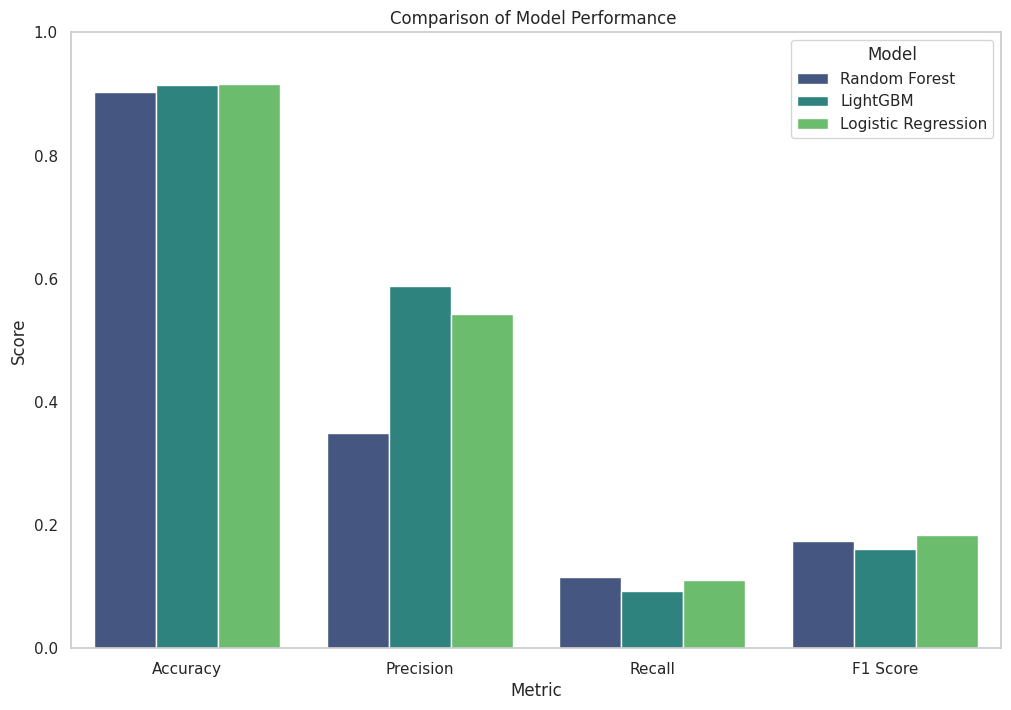

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already calculated the metrics for each model:
# rf_accuracy, rf_precision, rf_recall, rf_f1
# lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1
# logreg_accuracy, logreg_precision, logreg_recall, logreg_f1

# Create a dictionary to store the metrics
metrics_data = {
    'Model': ['Random Forest', 'LightGBM', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, lgbm_accuracy, lr_accuracy],
    'Precision': [rf_precision, lgbm_precision, lr_precision],
    'Recall': [rf_recall, lgbm_recall, lr_recall],
    'F1 Score': [rf_f1, lgbm_f1, lr_f1]
}

# Convert the dictionary to a Pandas DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Melt the DataFrame to long format for easier plotting with seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Comparison of Model Performance ')
plt.ylabel('Score')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1
plt.grid(axis='y')
plt.show()

In [ ]:
# Find the row with the highest Accuracy
best_accuracy_model_row = metrics_df.loc[metrics_df['Accuracy'].idxmax()]

# Get the name of the best model and its accuracy score
best_accuracy_model_name = best_accuracy_model_row['Model']
best_accuracy_score = best_accuracy_model_row['Accuracy']

# Find the row with the highest F1 Score
best_f1_model_row = metrics_df.loc[metrics_df['F1 Score'].idxmax()]

# Get the name of the best model and its F1 score
best_f1_model_name = best_f1_model_row['Model']
best_f1_score = best_f1_model_row['F1 Score']

# Print the results for both metrics
print(f"The best model based on Accuracy is: {best_accuracy_model_name}")
print(f"Its Accuracy score is: {best_accuracy_score:.4f}")
print("-" * 30) # Separator for clarity
print(f"The best model based on F1 Score is: {best_f1_model_name}")
print(f"Its F1 Score is: {best_f1_score:.4f}")

The best model based on Accuracy is: Logistic Regression
Its Accuracy score is: 0.9161
------------------------------
The best model based on F1 Score is: Logistic Regression
Its F1 Score is: 0.1833


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


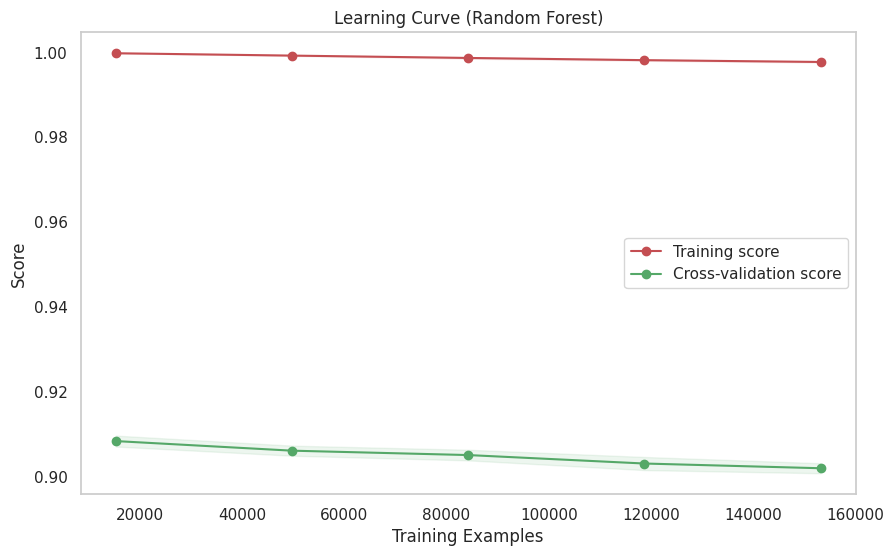

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Redefine x and y from the normalized_df used to train rf
x = normalized_df.drop(columns='HeartDisease')
y = normalized_df['HeartDisease']

train_sizes, train_scores_rf, test_scores_rf = learning_curve(
    rf, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), random_state=42)

train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean_rf - train_scores_std_rf,
                 train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean_rf - test_scores_std_rf,
                 test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean_rf, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean_rf, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

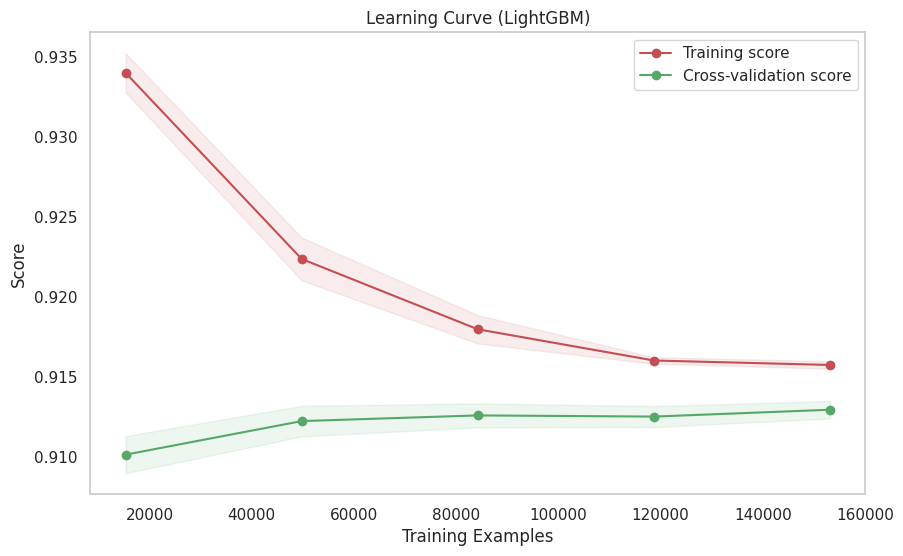

In [ ]:
train_sizes, train_scores_lgbm, test_scores_lgbm = learning_curve(
    lgbm_model, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), random_state=42)

train_scores_mean_lgbm = np.mean(train_scores_lgbm, axis=1)
train_scores_std_lgbm = np.std(train_scores_lgbm, axis=1)
test_scores_mean_lgbm = np.mean(test_scores_lgbm, axis=1)
test_scores_std_lgbm = np.std(test_scores_lgbm, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean_lgbm - train_scores_std_lgbm,
                 train_scores_mean_lgbm + train_scores_std_lgbm, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean_lgbm - test_scores_std_lgbm,
                 test_scores_mean_lgbm + test_scores_std_lgbm, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean_lgbm, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean_lgbm, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (LightGBM)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

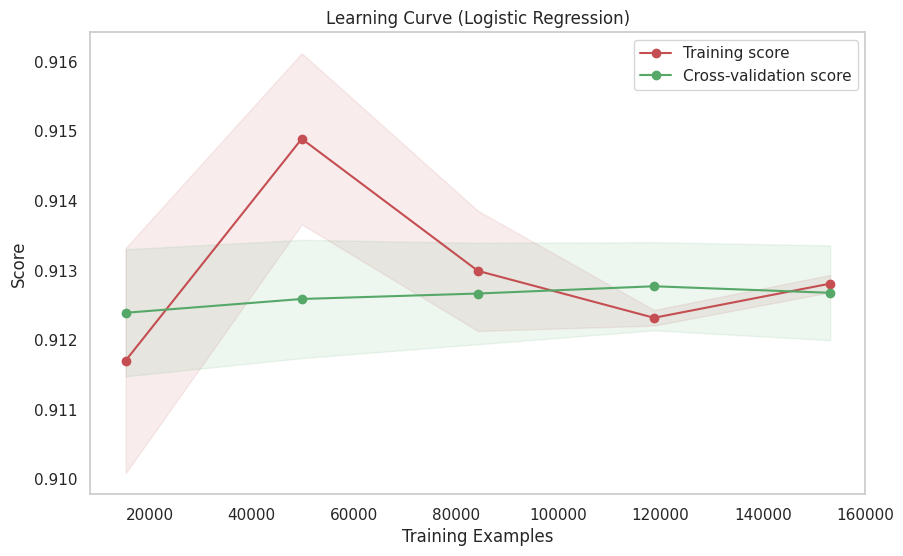

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assuming normalized_df, pipeline (the Logistic Regression pipeline),
# and other necessary variables (like rf, lgbm_model) are already defined
# from the previous cells.

# Redefine X and y from the normalized_df to be consistent for all learning curves
X_lr = normalized_df.drop(columns='HeartDisease')
y_lr = normalized_df['HeartDisease']

# Explicitly drop any potential NaNs from the data used for the learning curve
# Although dropna was done earlier, this is a safeguard for the learning_curve context
X_lr = X_lr.dropna()
y_lr = y_lr[X_lr.index] # Ensure y matches the filtered X indices

train_sizes, train_scores_lr, test_scores_lr = learning_curve(
    pipeline, X_lr, y_lr, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), random_state=42)

train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
test_scores_std_lr = np.std(test_scores_lr, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean_lr - train_scores_std_lr,
                 train_scores_mean_lr + train_scores_std_lr, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean_lr - test_scores_std_lr,
                 test_scores_mean_lr + test_scores_std_lr, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean_lr, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean_lr, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

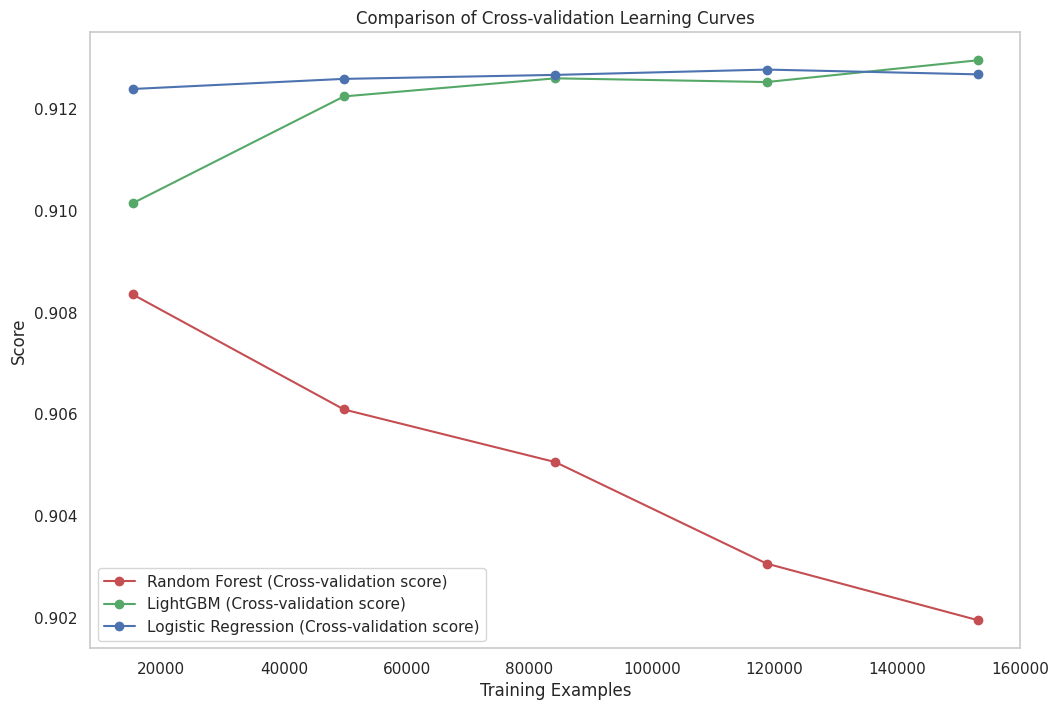

In [ ]:
plt.figure(figsize=(12, 8))

# Plot the cross-validation learning curve for Random Forest
plt.plot(train_sizes, test_scores_mean_rf, 'o-', color="r", label="Random Forest (Cross-validation score)")

# Plot the cross-validation learning curve for LightGBM
plt.plot(train_sizes, test_scores_mean_lgbm, 'o-', color="g", label="LightGBM (Cross-validation score)")

# Plot the cross-validation learning curve for Logistic Regression
plt.plot(train_sizes, test_scores_mean_lr, 'o-', color="b", label="Logistic Regression (Cross-validation score)")

plt.title("Comparison of Cross-validation Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()